# ARIMA(p,d,q)判断p与q，PACF和ACF来判断p、q
ACF（自相关系数）和PACF（偏自相关系数） 
AR（p）模型，PACF会在lag=p时截尾，也就是，PACF图中的值落入宽带区域中。
MA（q）模型，ACF会在lag=q时截尾，同理，ACF图中的值落入宽带区域中。
#statsmodels结果显示的是（q，p）而不是（p，q）

In [1]:
import pandas as pd
data0=pd.read_excel(r"10keras_data.xlsx",sheet_name=0)#
data0.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,order,moto brand,Samsung brand,moto g5 plus vs j7 prime,moto g5 plus vs moto g5,moto g4 plus vs moto g5 plus,moto g5 plus walmart,moto g5 plus at&t,moto g5 plus price,moto g5 plus caracteristicas,moto g5 plus review
0,17600,58,66,17,41,64,36,36,27,19,85
1,12400,57,75,0,45,71,9,0,17,10,0
2,11900,56,65,0,16,42,44,59,30,27,28
3,14300,65,71,0,39,89,0,43,19,37,0
4,25300,62,75,0,26,34,47,51,46,33,60


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


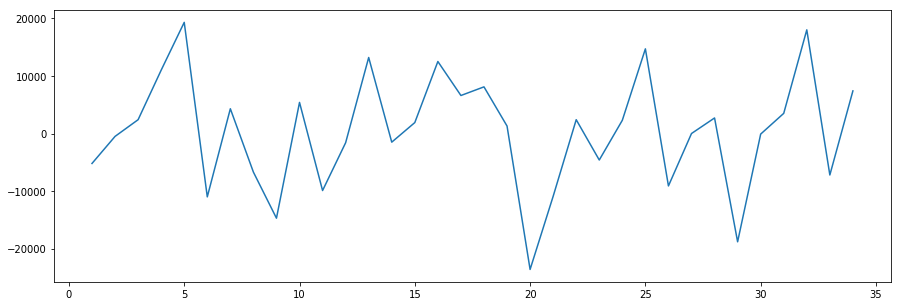

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
#data0["order"]
#已知0阶不平稳，1阶平稳，所以先差分一次
#print(data0["order"])

data2Diff = data0["order"].diff()  # 差分
data2Diff.plot(figsize=(15,5))

temp = np.array(data2Diff)[1:] # 差分后第一个值为NaN,舍去


In [3]:
sm.tsa.arma_order_select_ic(temp,max_ar=6,max_ma=6,ic='aic')['aic_min_order']
#结果显示的是（q，p）而不是（p，q）,这里结果相反

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).cop

(1, 4)